In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("household_water_usage_jan_mar_2024.csv")

print(df.head())

print(df.shape)

print(df.isnull().sum())


         Date Household_ID  Total_Usage_Liters  Kitchen_Usage_Liters  \
0  2024-01-01         HH_1              453.08                131.00   
1  2024-01-01         HH_2              488.55                128.11   
2  2024-01-01         HH_3              623.78                130.03   
3  2024-01-01         HH_4              500.52                157.84   
4  2024-01-01         HH_5              504.70                165.26   

   Bathroom_Usage_Liters  Laundry_Usage_Liters  
0                 215.75                106.34  
1                 222.13                138.31  
2                 357.39                136.36  
3                 294.79                 47.90  
4                 226.85                112.59  
(910, 6)
Date                     0
Household_ID             0
Total_Usage_Liters       0
Kitchen_Usage_Liters     0
Bathroom_Usage_Liters    0
Laundry_Usage_Liters     0
dtype: int64


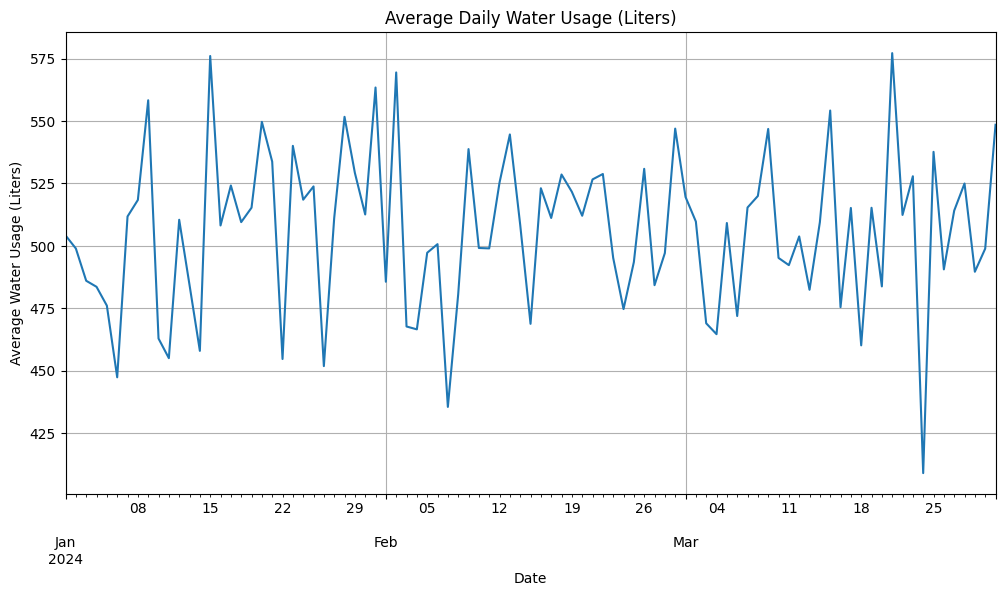

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])


daily_avg = df.groupby('Date')['Total_Usage_Liters'].mean()


daily_avg.plot(figsize=(12,6), title="Average Daily Water Usage (Liters)")
plt.xlabel("Date")
plt.ylabel("Average Water Usage (Liters)")
plt.grid(True)
plt.show()

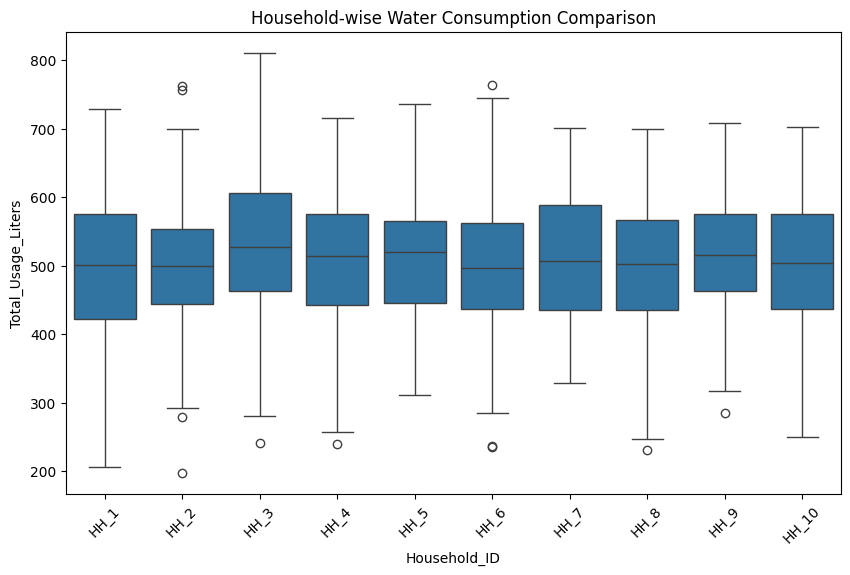

In [ ]:
import seaborn as sns


plt.figure(figsize=(10,6))
sns.boxplot(x='Household_ID', y='Total_Usage_Liters', data=df)
plt.title("Household-wise Water Consumption Comparison")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import zscore

df['Z_score'] = zscore(df['Total_Usage_Liters'])
anomalies = df[df['Z_score'].abs() > 2.5]
print("Anomalous Days:\n", anomalies[['Date', 'Household_ID', 'Total_Usage_Liters']])


Anomalous Days:
           Date Household_ID  Total_Usage_Liters
59  2024-01-06        HH_10              252.84
97  2024-01-10         HH_8              230.31
105 2024-01-11         HH_6              234.90
141 2024-01-15         HH_2              756.01
230 2024-01-24         HH_1              257.61
299 2024-01-30        HH_10              250.06
372 2024-02-07         HH_3              240.90
453 2024-02-15         HH_4              257.58
595 2024-02-29         HH_6              764.43
610 2024-03-02         HH_1              205.96
631 2024-03-04         HH_2              198.05
723 2024-03-13         HH_4              239.58
742 2024-03-15         HH_3              810.99
822 2024-03-23         HH_3              798.53
835 2024-03-24         HH_6              236.43
841 2024-03-25         HH_2              762.08
907 2024-03-31         HH_8              247.04
